## Cubic

In [1]:
import numpy as np
import matplotlib.pyplot as plt

engression_cubic_results = np.load('simresults2_engression.npz', allow_pickle=True)
results1 = engression_cubic_results['results_cubic1'].item()  
results2 = engression_cubic_results['results_cubic2'].item()

engression_cubic_results_L2 = np.load('simresults2_regression.npz', allow_pickle=True)
results1_L2 = engression_cubic_results_L2['results_cubic1'].item()  
results2_L2 = engression_cubic_results_L2['results_cubic2'].item()

### Beta Estimate

#### Case 1: Gaussian Error

In [2]:
engression_beta_estimates = results1['weight_estimates']
beta_mean_engression = engression_beta_estimates.mean(axis=0) 

regression_beta_estimates = results1_L2['weight_estimates']
beta_mean_regression = regression_beta_estimates.mean(axis=0) 

print('Engression weight mean estimate:', beta_mean_engression)
print('Regression weight mean estimate:', beta_mean_regression)

beta_var_engression = engression_beta_estimates.var(axis=0) 
beta_var_regression = regression_beta_estimates.var(axis=0) 

print('Engression weight variance estimate:', beta_var_engression)
print('Regression weight variance estimate:', beta_var_regression)

Engression weight mean estimate: [ 1.         -0.01922779 -1.139465    0.02411044  0.4109792  -0.50748974
 -0.1677124   0.7259503  -0.25912303 -0.4715209  -0.10133338 -0.0728756
  0.68357027  0.29273957 -0.19339773  0.37580147  1.005388   -0.4961783
  0.03762437 -0.23948514 -0.42553258  0.6596544  -0.026562    0.00312851
 -0.18153685  0.05213282 -0.18653771 -0.1561463  -0.02500703  0.0148096
  0.5393332   0.40982348  0.13592608  0.29048222  0.4669903  -0.06192446
  0.11103095  0.0592628  -0.22572513  0.19064853 -0.10895824  0.07088673
 -0.11449941  0.2434943   0.19970994 -0.546082   -0.21383436 -0.253915
  0.24697837 -0.2721048   0.17550318 -0.13329265  0.44019365  0.4503842
  0.12566474  0.6236855   0.20213525 -0.29205948 -0.06863806 -0.3403164
  1.2584352   0.09140392  0.02893454 -0.9621455 ]
Regression weight mean estimate: [ 1.00000000e+00  2.07389116e-01  4.35363293e-01 -2.19869423e+00
  3.84381145e-01 -5.13291001e-01  8.79232436e-02  1.68056226e+00
 -1.94262192e-01 -8.88951480e-0

#### Case 2: Uniform Error

In [3]:
engression_beta_estimates = results2['weight_estimates']
beta_mean_engression = engression_beta_estimates.mean(axis=0) 

regression_beta_estimates = results2_L2['weight_estimates']
beta_mean_regression = regression_beta_estimates.mean(axis=0) 

print('Engression weight mean estimate:', beta_mean_engression)
print('Regression weight mean estimate:', beta_mean_regression)

beta_var_engression = engression_beta_estimates.var(axis=0) 
beta_var_regression = regression_beta_estimates.var(axis=0) 

print('Engression weight variance estimate:', beta_var_engression)
print('Regression weight variance estimate:', beta_var_regression)

Engression weight mean estimate: [ 1.          0.00716543 -1.542077   -0.18709882  0.47468185 -0.68677837
 -0.2418236   0.996932   -0.61378914 -0.7065334  -0.17533551 -0.11141981
  1.1207082   0.39079335 -0.45505843  0.35325825  1.2278341  -0.45585585
  0.2621541   0.01443018 -0.63951457  1.0348771   0.10958932 -0.04860073
 -0.05103202  0.07996116 -0.27871183 -0.24528971  0.06414335  0.13117674
  0.8757056   0.6873496   0.31984407  0.38419592  0.51532626 -0.09453987
  0.02485433  0.07057977 -0.1741211   0.04192111 -0.1014462  -0.082982
 -0.0135544   0.38003606  0.1724712  -0.6616032  -0.15543048 -0.49919146
  0.43895358 -0.4938225   0.31384745 -0.10570149  0.5418399   0.6170248
  0.20883243  0.8411792   0.13734174 -0.59179854 -0.15783402 -0.52832234
  1.7177826   0.12344332  0.02957816 -1.1965361 ]
Regression weight mean estimate: [ 1.          0.7691836   0.86801636 -2.1712232   0.36772802 -0.72459203
 -0.40075225  1.9666593  -0.04448001 -0.9049236   0.4307716   0.43316072
  0.0602391

### Estimate of function $g(\cdot)$, with true $\beta$

#### 1. Gaussian Error

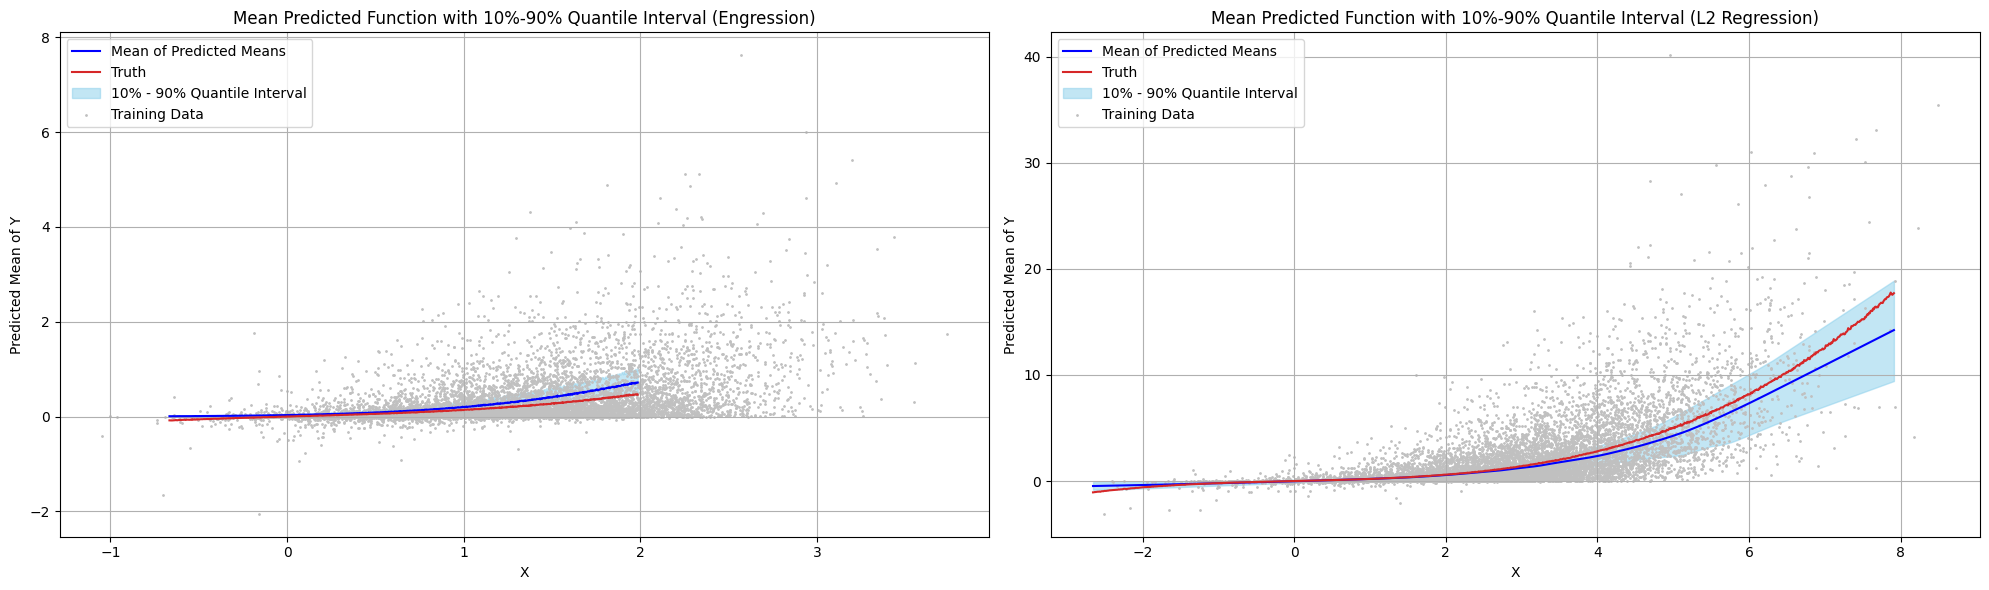

In [4]:
# Access the results
predicted_means = results1['predicted_funs_mean']                            
x_train = results1['x_train']
y_train = results1['y_train']
x_test = results1['x_test']   
y_true_mean = results1['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results1_L2['predicted_funs']                        
x_train_L2 = results1_L2['x_train']
y_train_L2 = results1_L2['y_train']
x_test_L2 = results1_L2['x_test']   
y_true_mean_L2 = results1_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


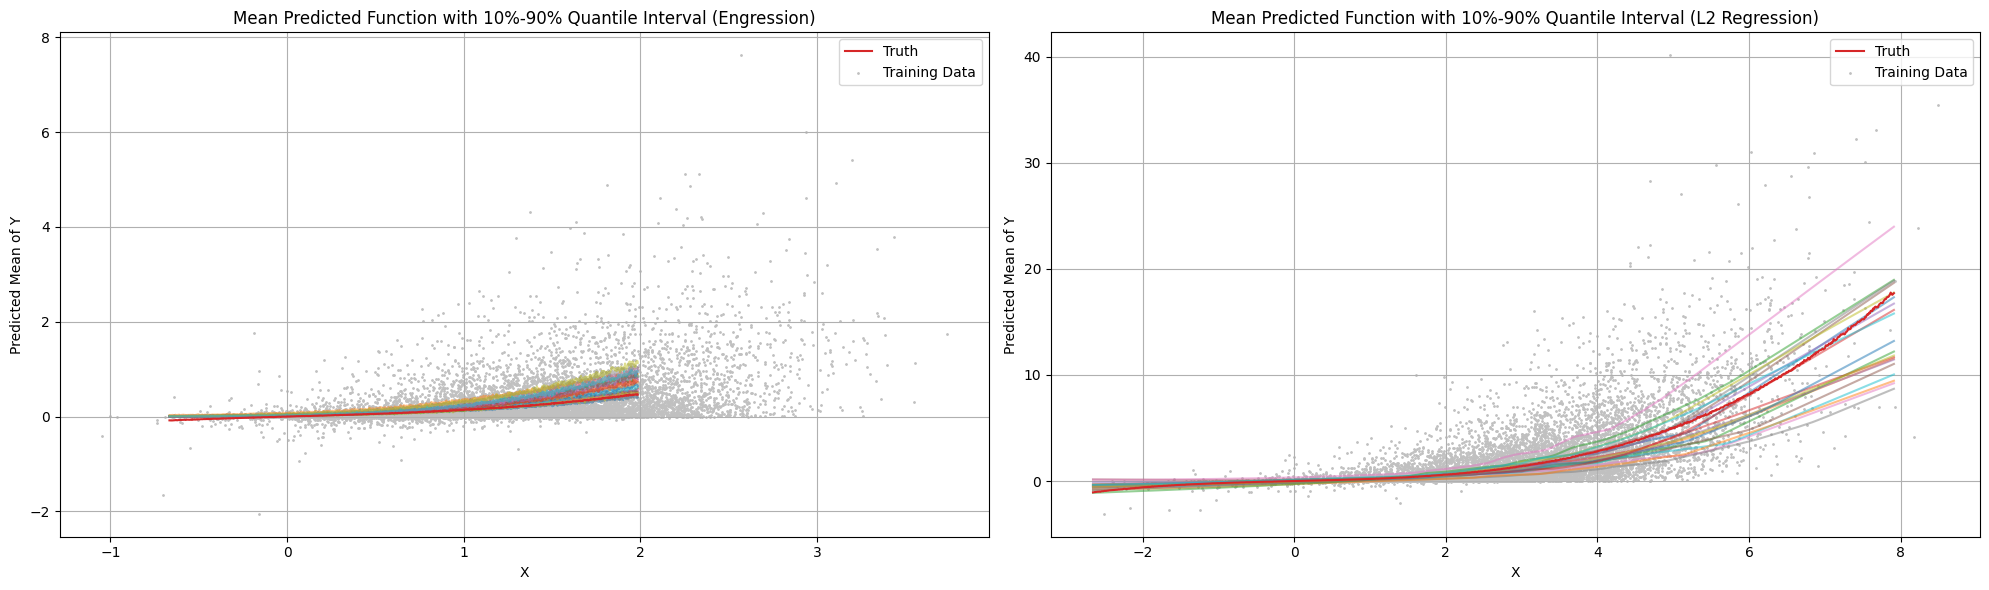

In [5]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test_L2, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    

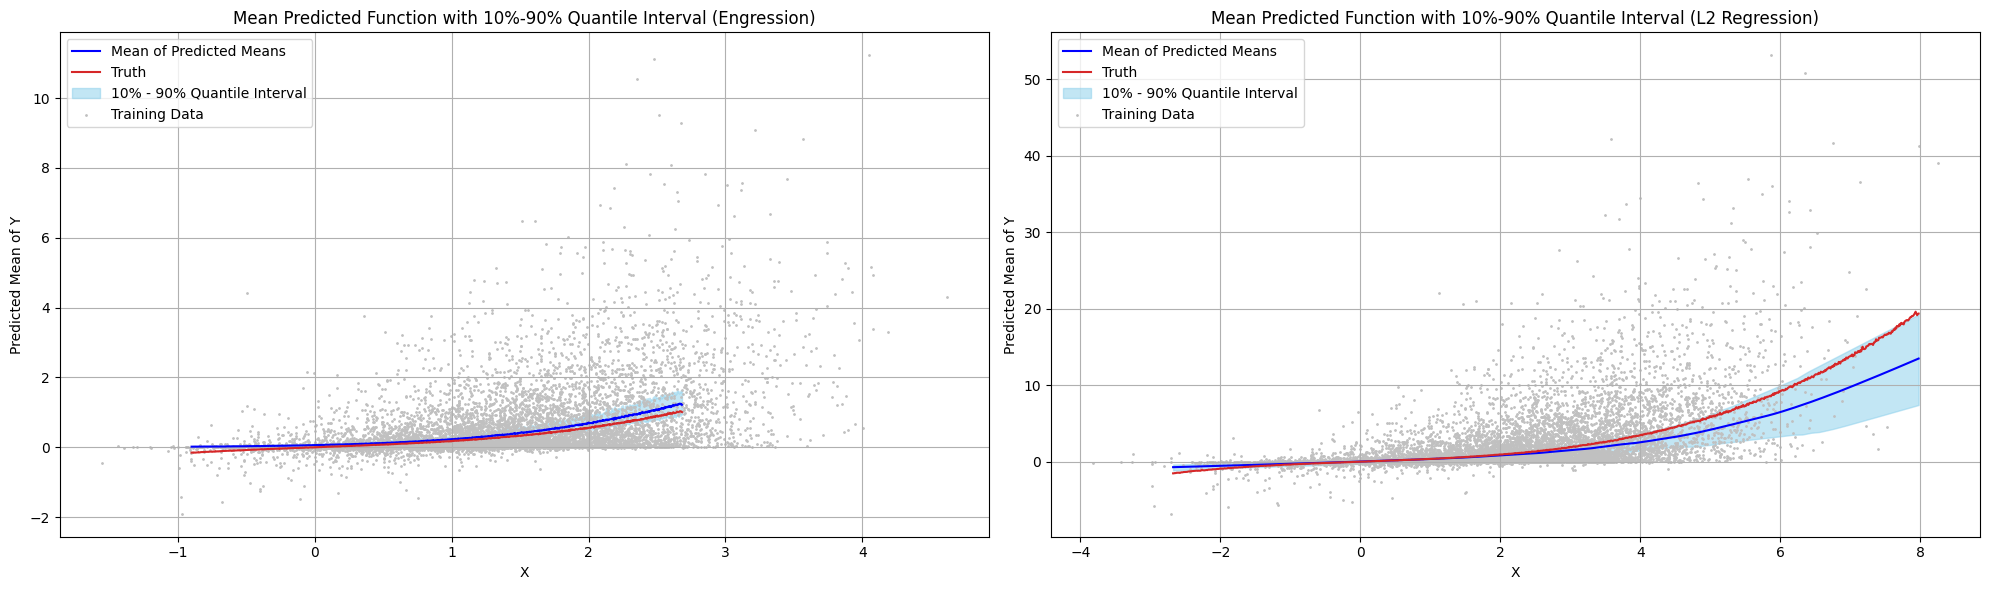

In [6]:
# Access the results
predicted_means = results2['predicted_funs_mean']                            
x_train = results2['x_train']
y_train = results2['y_train']
x_test = results2['x_test']   
y_true_mean = results2['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results2_L2['predicted_funs']                        
x_train_L2 = results2_L2['x_train']
y_train_L2 = results2_L2['y_train']
x_test_L2 = results2_L2['x_test']   
y_true_mean_L2 = results2_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


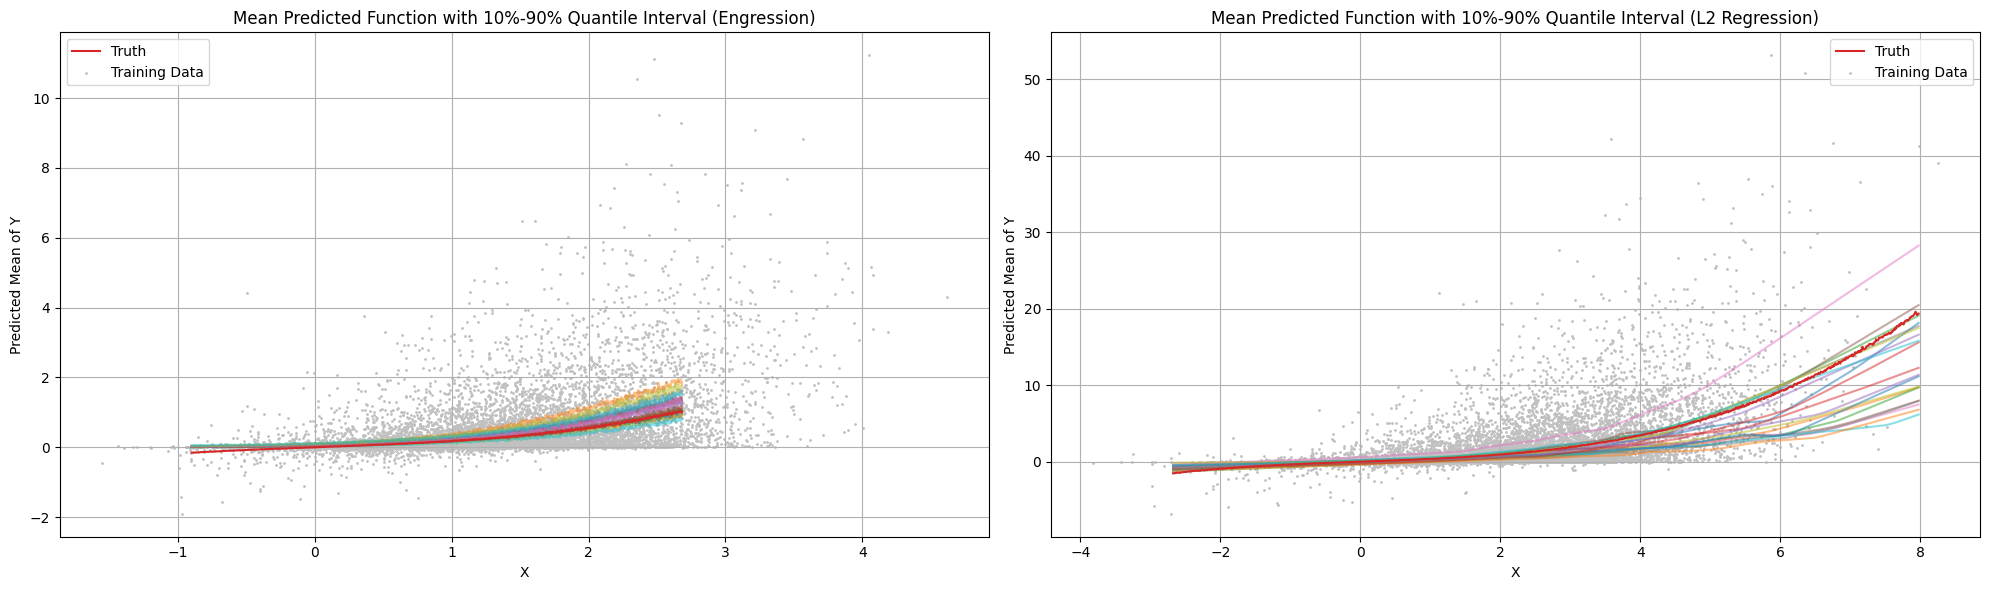

In [8]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test_L2, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    

### Estimate of function $g(\cdot)$, with $\hat{\beta}$

#### 1. Gaussian Error

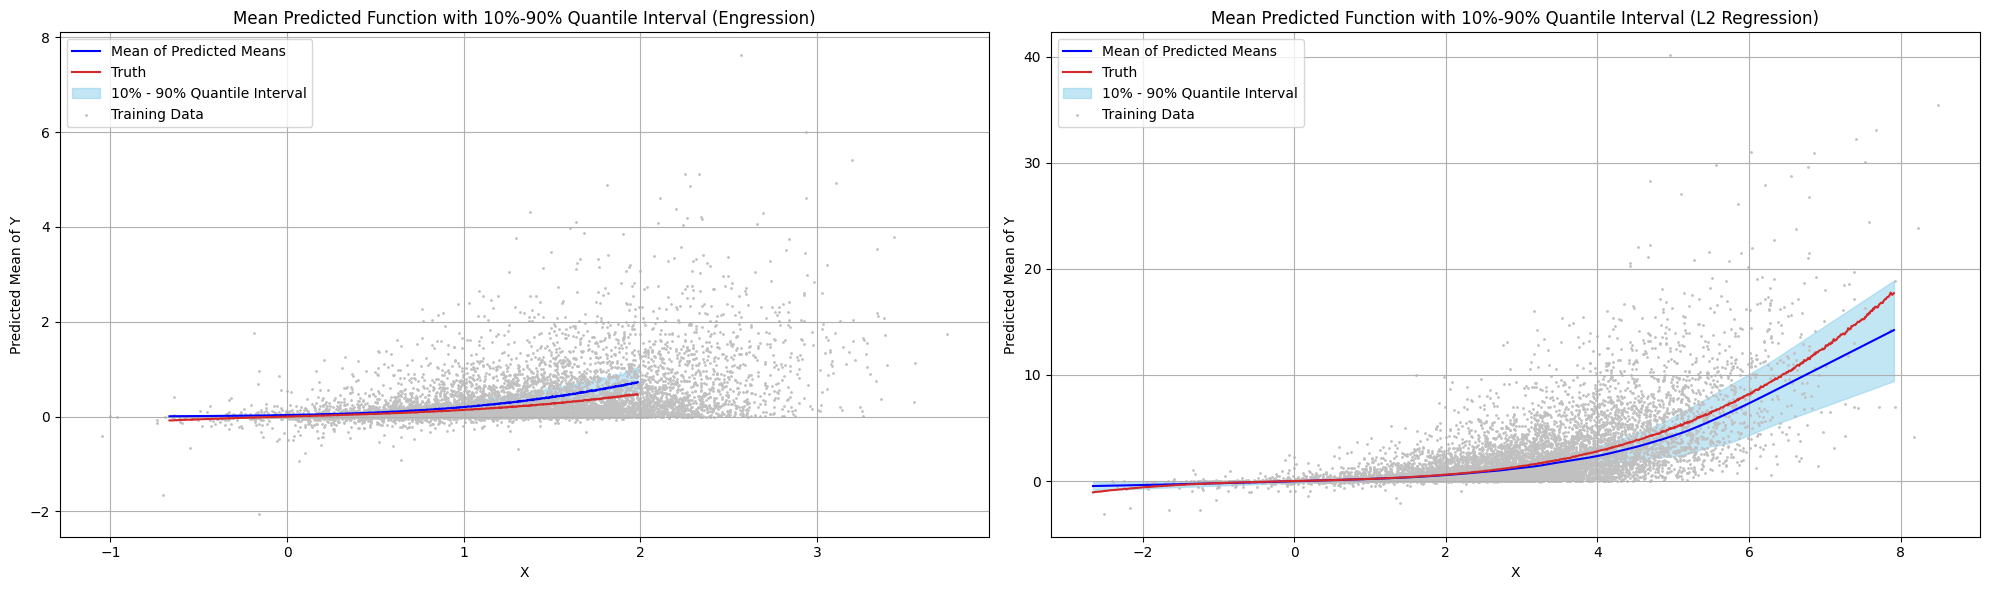

In [9]:
# Access the results
predicted_means = results1['predicted_means']                            
x_train = results1['x_train']
y_train = results1['y_train']
x_test = results1['x_test']   
y_true_mean = results1['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results1_L2['predicted_means']                        
x_train_L2 = results1_L2['x_train']
y_train_L2 = results1_L2['y_train']
x_test_L2 = results1_L2['x_test']   
y_true_mean_L2 = results1_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


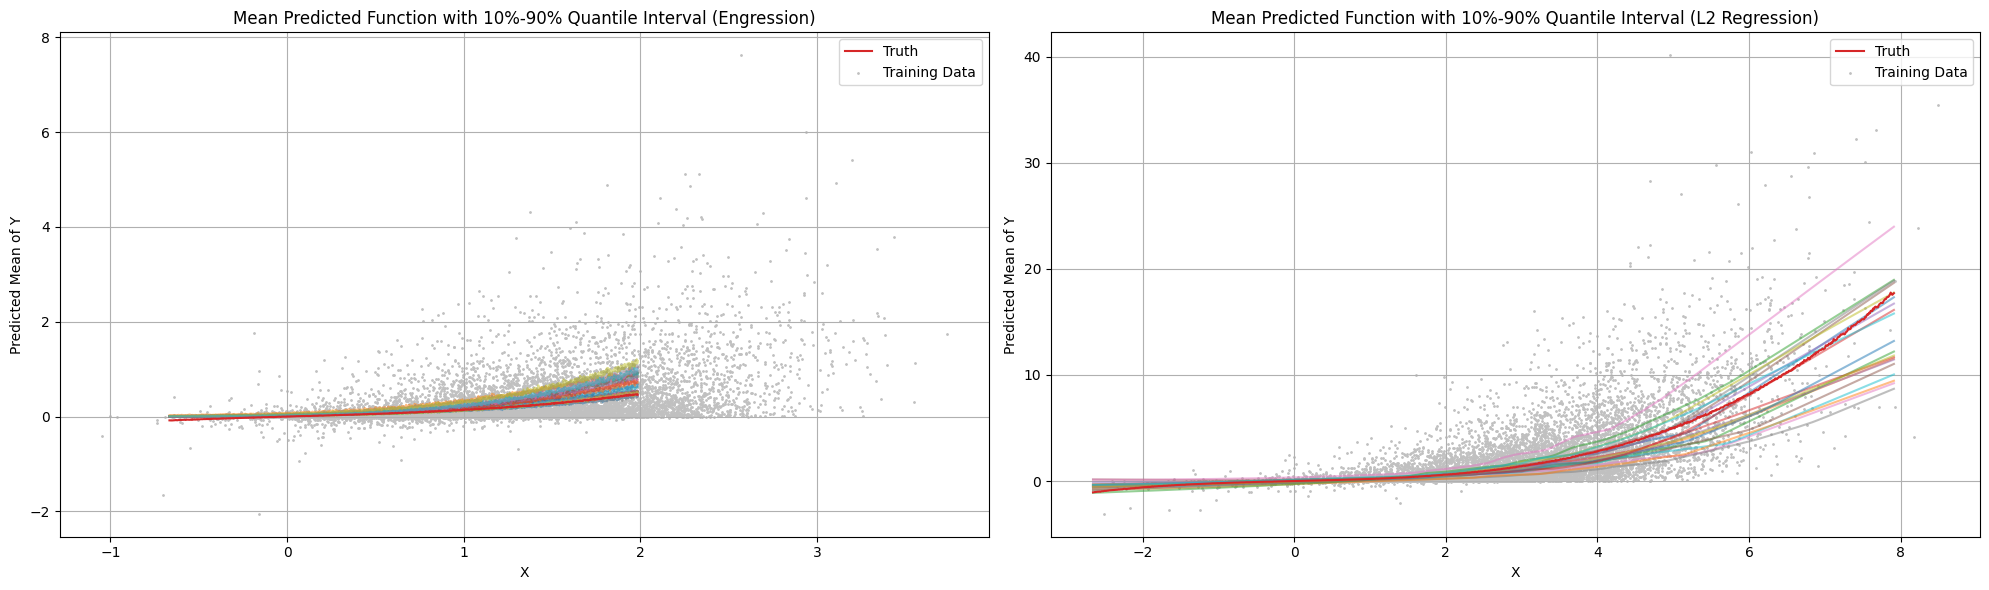

In [10]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test_L2, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    

#### 2. Uniform Error 

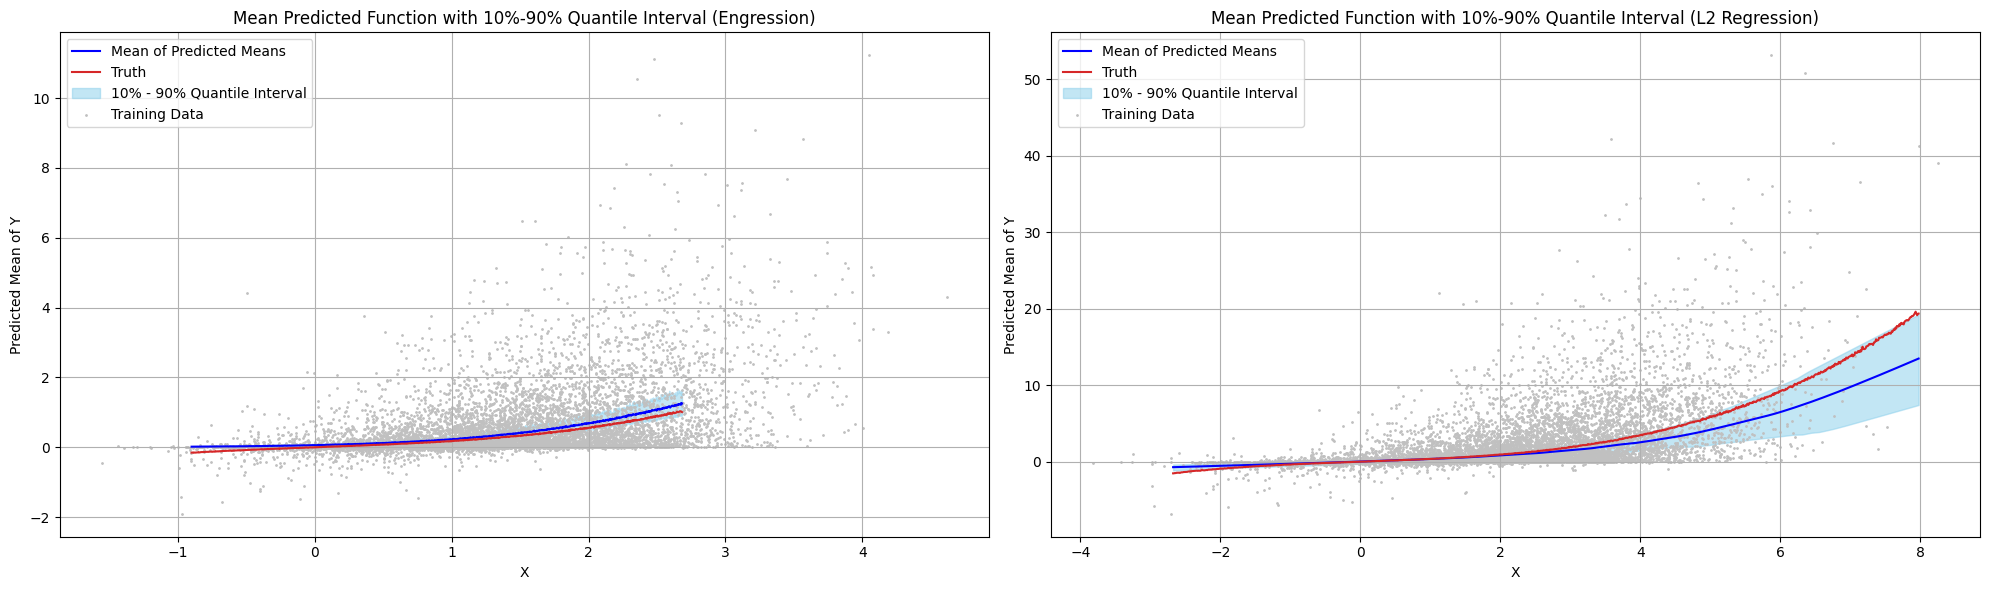

In [11]:
# Access the results
predicted_means = results2['predicted_means']                            
x_train = results2['x_train']
y_train = results2['y_train']
x_test = results2['x_test']   
y_true_mean = results2['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results2_L2['predicted_means']                        
x_train_L2 = results2_L2['x_train']
y_train_L2 = results2_L2['y_train']
x_test_L2 = results2_L2['x_test']   
y_true_mean_L2 = results2_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


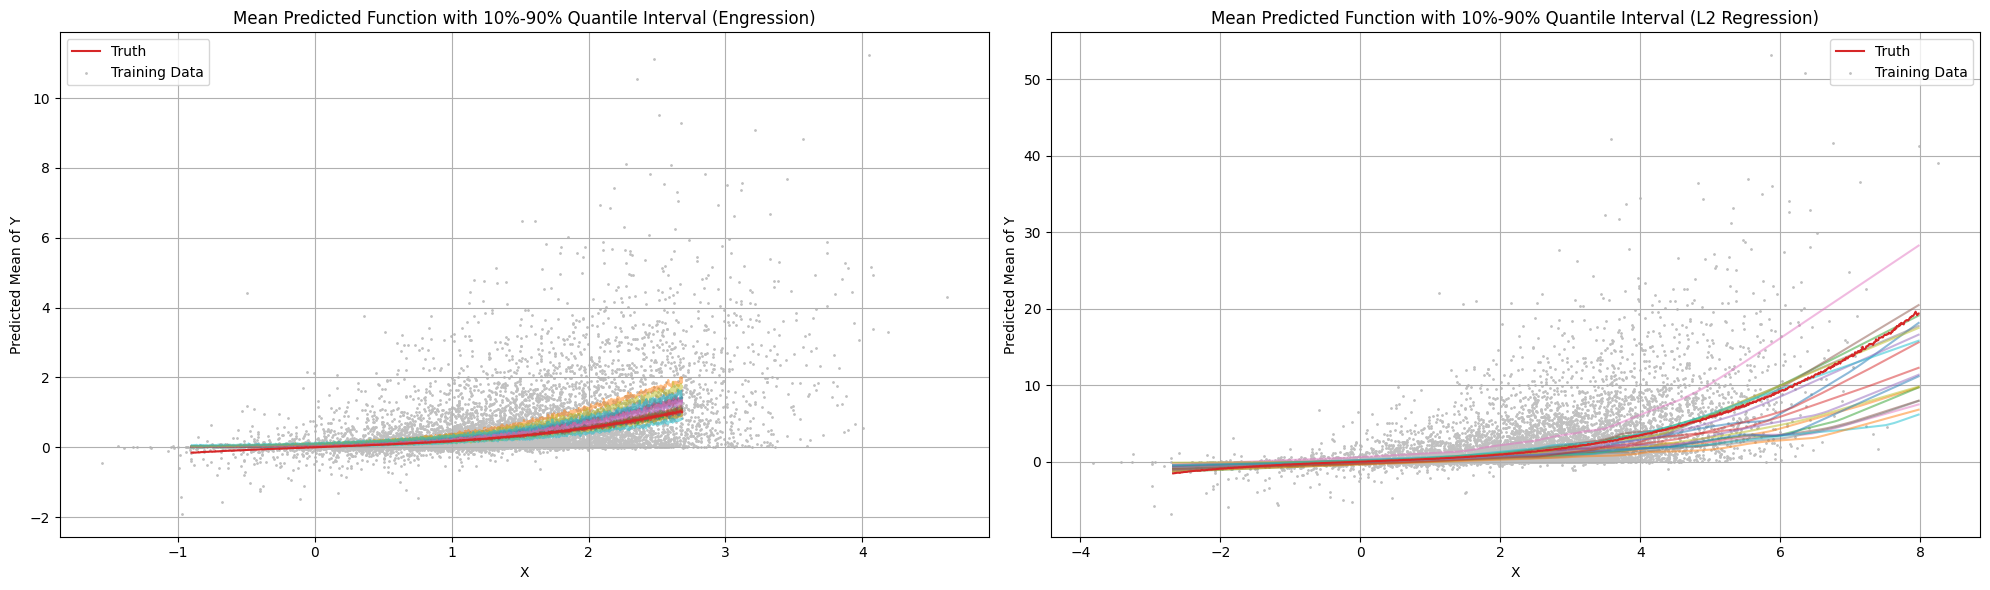

In [12]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test_L2, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    